In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
from datetime import datetime, date, time

# 엑셀 파일을 읽을 때 글꼴, 정렬, 테두리 등의 기본 스타일이 지정되어 있지 않으면 경고 메시지 출력해줌 이 때 경고메시지를 숨기고 싶을 때 다음과 같은 코드 작성
warnings.filterwarnings("ignore")

# 데이터 병합
file_list = os.listdir('./')
file_list_xlsx = [file for file in file_list if file.endswith('.xlsx')]
file_list_xlsx

['대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2009_hr.xlsx']

In [2]:
df = pd.DataFrame() # 빈 데이터프레임 객체 생성
for file_name in file_list_xlsx:
    data = pd.read_excel(f'./{file_name}')
    df = pd.concat([df, data])  # 데이터가 합쳐짐
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20130101,0,16.4,44.30,740
1,대전태평,(암반),20130101,1,16.4,44.30,740
2,대전태평,(암반),20130101,2,16.4,44.30,740
3,대전태평,(암반),20130101,3,16.4,44.30,740
4,대전태평,(암반),20130101,4,16.4,44.30,740
...,...,...,...,...,...,...,...
8619,대전태평,(암반),20091231,19,16.2,44.47,741
8620,대전태평,(암반),20091231,20,16.2,44.47,741
8621,대전태평,(암반),20091231,21,16.2,44.47,741
8622,대전태평,(암반),20091231,22,16.2,44.47,741


In [3]:
# 인덱스 재설정
df.sort_values(by=['날짜', '시간'], inplace=True)
df
df.reset_index(inplace=True, drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [5]:
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d') + pd.to_timedelta(df['시간'], unit='h')
df.set_index('Date', inplace=True)
df.head()

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
Date,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749
2009-01-01 03:00:00,대전태평,(암반),20090101,3,16.1,44.47,749
2009-01-01 04:00:00,대전태평,(암반),20090101,4,16.1,44.47,749


In [6]:
df2 = df[['수온(℃)', '수위(el.m)', 'EC(㎲/㎝)']]
df2.columns = ['temp', 'level', 'EC']
df2

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749
2009-01-01 03:00:00,16.1,44.47,749
2009-01-01 04:00:00,16.1,44.47,749
...,...,...,...
2016-12-31 19:00:00,16.2,44.49,725
2016-12-31 20:00:00,16.2,44.49,725
2016-12-31 21:00:00,16.2,44.49,725


In [7]:
df2.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [8]:
df2.to_csv('대전지하수.csv', encoding='utf-8')

In [9]:
df2.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


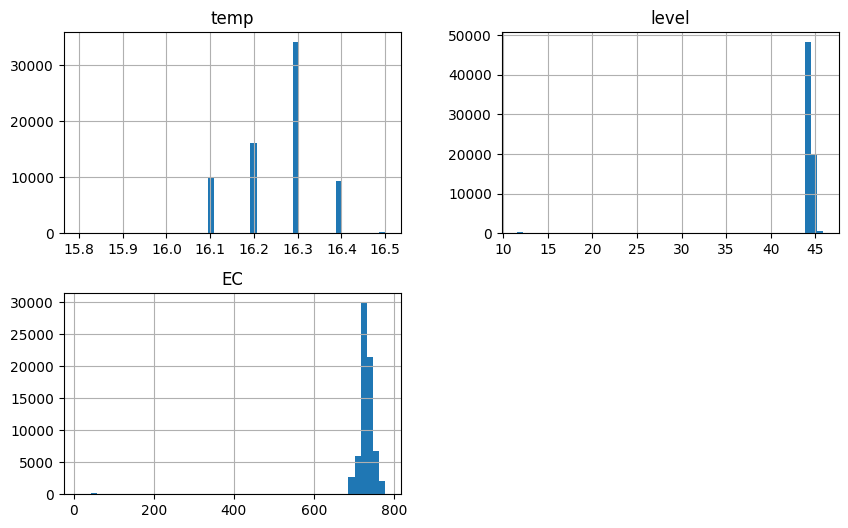

In [10]:
# 맷플롯립 라이브러리가 import되어 있으면 pandas가 알아서 그래프를 그려줌
df2.hist(bins=50, figsize=(10, 6))
plt.show()  # plt가 가지고 있는 이미지를 메모리에서 제거


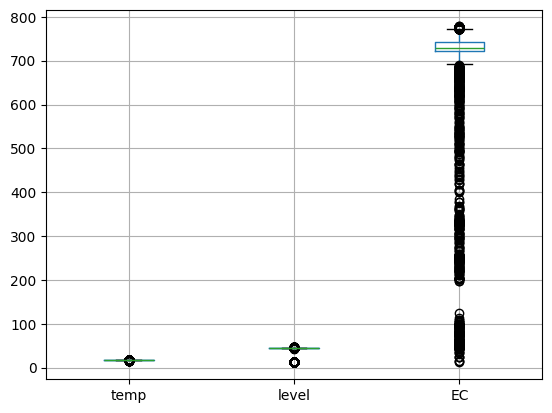

In [11]:
df2.boxplot()
plt.show()

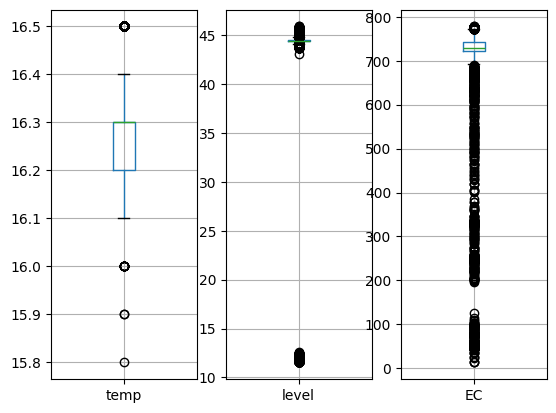

In [12]:
plt.subplot(1, 3, 1)
df2.boxplot(column='temp')
plt.subplot(1, 3, 2)
df2.boxplot(column='level')
plt.subplot(1, 3, 3)
df2.boxplot(column='EC')
plt.show()

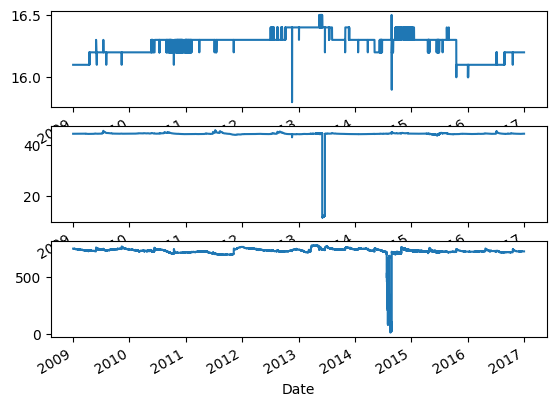

In [13]:
# 다중 시계열 그래프
plt.subplot(3, 1, 1)
df2['temp'].plot()
plt.subplot(3, 1, 2)
df2['level'].plot()
plt.subplot(3, 1, 3)
df2['EC'].plot()
plt.show()

In [14]:
q3_level = df2['level'].quantile(q=0.75)
q1_level = df2['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

0.17999999999999972


In [15]:
upper_level = q3_level + 1.5 * iqr_level # 최대값
lower_level = q1_level - 1.5 * iqr_level # 최소값
print(f'{upper_level}/{lower_level}')
print((df2['level'] > upper_level).sum())
print((df2['level'] < lower_level).sum())

44.81999999999999/44.099999999999994
4492
1273


<Axes: xlabel='Date'>

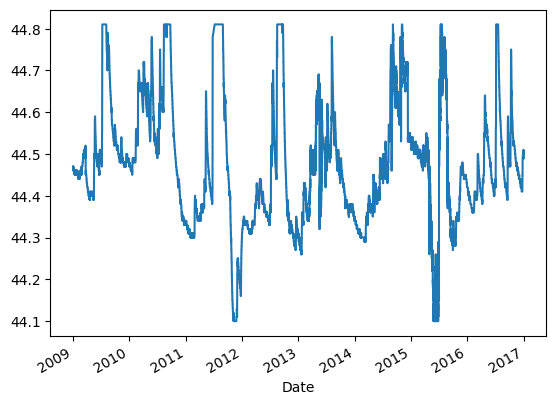

In [16]:
df_iqr_level = df2[(df2['level'] < upper_level) & (df2['level'] > lower_level)]
df_iqr_level['level'].plot()

In [17]:
# 지하수온 IQR 구하기
q3_temp = df2['temp'].quantile(q=0.75)
q1_temp = df2['temp'].quantile(q=0.25)
iqr_temp = q3_temp - q1_temp
print(iqr_temp)

0.10000000000000142


In [18]:
# 지하수온 상한값, 하한값, 이상치 개수 구하기
upper_temp = q3_temp + 1.5 * iqr_temp # 최대값
lower_temp = q1_temp - 1.5 * iqr_temp # 최소값
print(f'{upper_temp}/{lower_temp}')
print((df2['temp'] > upper_temp).sum())
print((df2['temp'] < lower_temp).sum())

16.450000000000003/16.049999999999997
227
15


<Axes: xlabel='Date'>

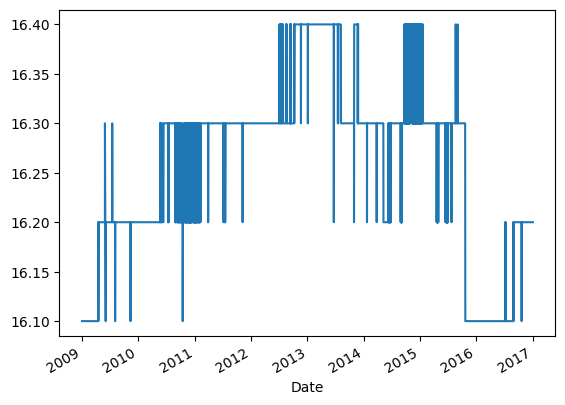

In [19]:
df_iqr_temp = df2[(df2['temp'] < upper_temp) & (df2['temp'] > lower_temp)]
df_iqr_temp['temp'].plot()

In [20]:
# 전기전도도 IQR 구하기
q3_ec = df2['EC'].quantile(q=0.75)
q1_ec = df2['EC'].quantile(q=0.25)
iqr_ec = q3_ec - q1_ec
print(iqr_ec)

20.0


In [21]:
# 전기전도도 상한값, 하한값, 이상치 개수 구하기
upper_ec = q3_ec + 1.5 * iqr_ec # 최대값
lower_ec = q1_ec - 1.5 * iqr_ec # 최소값
print(f'{upper_ec}/{lower_ec}')
print((df2['EC'] > upper_ec).sum())
print((df2['EC'] < lower_ec).sum())

772.0/692.0
831
788


<Axes: xlabel='Date'>

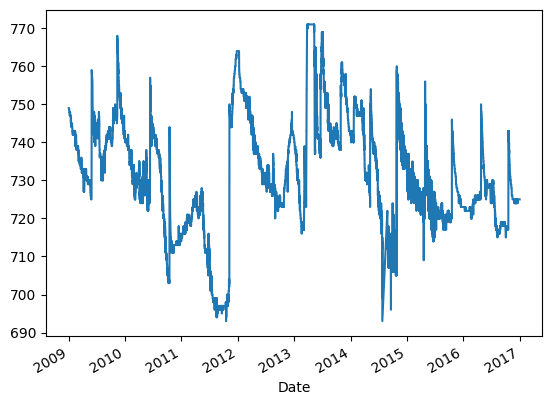

In [23]:
df_iqr_ec = df2[(df2['EC'] < upper_ec) & (df2['EC'] > lower_ec)]
df_iqr_ec['EC'].plot()

In [24]:
df_iqr = df2[(df2['level'] < upper_level) & (df2['level'] > lower_level) & (df2['temp'] < upper_temp) & (df2['temp'] > lower_temp) & (df2['EC'] < upper_ec) & (df2['EC'] > lower_ec)]
df_iqr

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749
2009-01-01 03:00:00,16.1,44.47,749
2009-01-01 04:00:00,16.1,44.47,749
...,...,...,...
2016-12-31 19:00:00,16.2,44.49,725
2016-12-31 20:00:00,16.2,44.49,725
2016-12-31 21:00:00,16.2,44.49,725


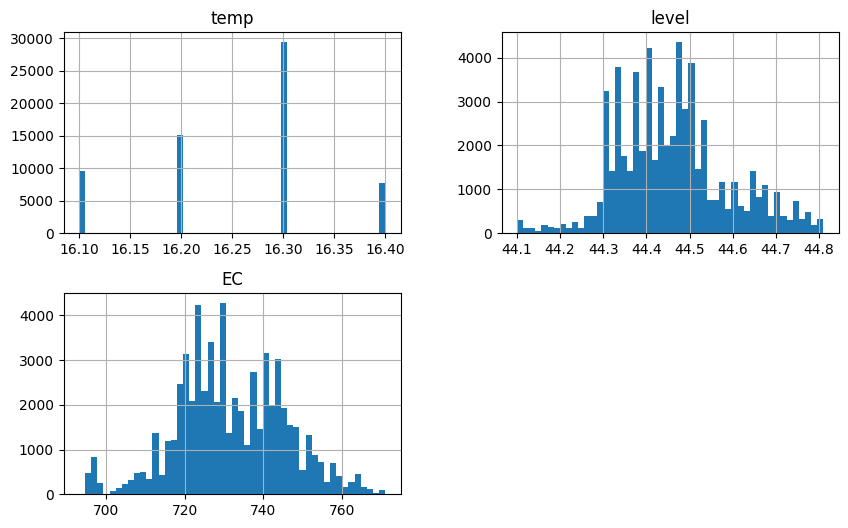

In [25]:
df_iqr.hist(bins=50, figsize=(10, 6))
plt.show()

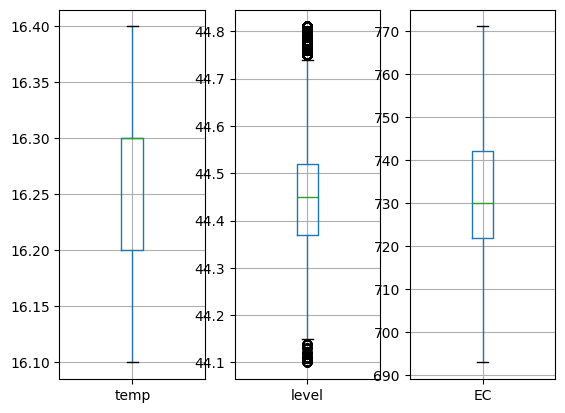

In [26]:
plt.subplot(1, 3, 1)
df_iqr.boxplot(column='temp')
plt.subplot(1, 3, 2)
df_iqr.boxplot(column='level')
plt.subplot(1, 3, 3)
df_iqr.boxplot(column='EC')
plt.show()

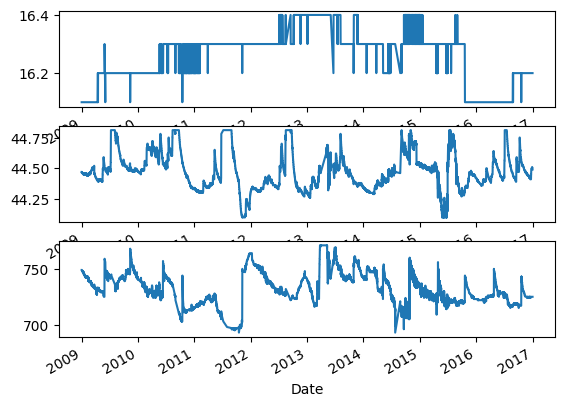

In [27]:
# 다중 시계열 그래프
plt.subplot(3, 1, 1)
df_iqr['temp'].plot()
plt.subplot(3, 1, 2)
df_iqr['level'].plot()
plt.subplot(3, 1, 3)
df_iqr['EC'].plot()
plt.show()

In [28]:
df_iqr.to_csv('대전지하수_정제.csv', encoding='utf-8')

In [29]:
df_iqr = df_iqr[['level', 'EC']]
df_iqr.describe()

,level,EC
count,61814.000000,61814.000000
mean,44.459701,731.698612
std,0.128256,13.882905
min,44.100000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,742.000000
max,44.810000,771.000000


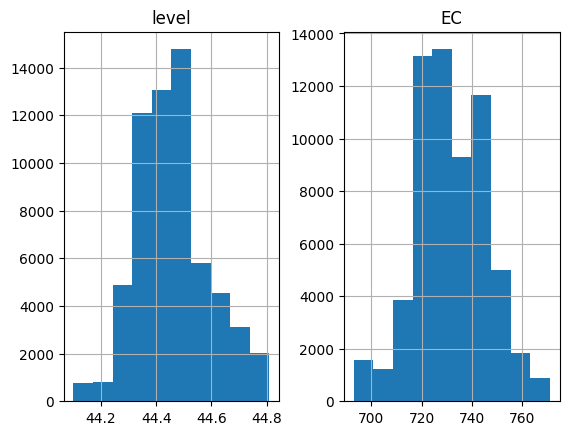

In [31]:
df_iqr.hist()
plt.show()

In [32]:
df1 = df_iqr.copy()
df1['level_z_score'] = (df1['level'] - df1['level'].mean()) / df1['level'].std()
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) / df1['EC'].std()
df1

,level,EC,level_z_score,EC_z_score
Date,,,,
2009-01-01 00:00:00,44.47,749,0.080300,1.246237
2009-01-01 01:00:00,44.47,749,0.080300,1.246237
2009-01-01 02:00:00,44.47,749,0.080300,1.246237
2009-01-01 03:00:00,44.47,749,0.080300,1.246237
2009-01-01 04:00:00,44.47,749,0.080300,1.246237
...,...,...,...,...
2016-12-31 19:00:00,44.49,725,0.236238,-0.482508
2016-12-31 20:00:00,44.49,725,0.236238,-0.482508
2016-12-31 21:00:00,44.49,725,0.236238,-0.482508


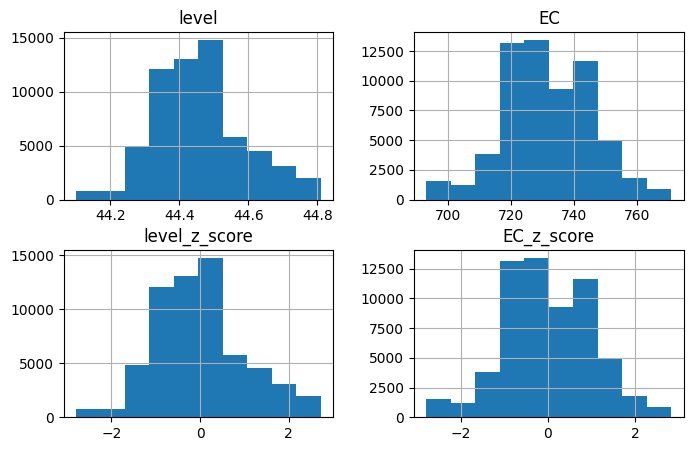

In [33]:
df1.hist(figsize=(8, 5))
plt.show()

In [34]:
df3 = df_iqr.copy()
df3_standard = (df3 - df3.mean()) / df3.std()
df3_standard

,level,EC
Date,,
2009-01-01 00:00:00,0.080300,1.246237
2009-01-01 01:00:00,0.080300,1.246237
2009-01-01 02:00:00,0.080300,1.246237
2009-01-01 03:00:00,0.080300,1.246237
2009-01-01 04:00:00,0.080300,1.246237
...,...,...
2016-12-31 19:00:00,0.236238,-0.482508
2016-12-31 20:00:00,0.236238,-0.482508
2016-12-31 21:00:00,0.236238,-0.482508


In [35]:
# 정규화(Standardization): 0 ~ 1사이의 값으로 변환
df5 = df_iqr.copy()
df5['level_minmax'] = (df5['level'] - df5['level'].min()) / (df5['level'].max() - df5['level'].min())
df5['EC_minmax'] = (df5['EC'] - df5['EC'].min()) / (df5['EC'].max() - df5['EC'].min())
df5

,level,EC,level_minmax,EC_minmax
Date,,,,
2009-01-01 00:00:00,44.47,749,0.521127,0.717949
2009-01-01 01:00:00,44.47,749,0.521127,0.717949
2009-01-01 02:00:00,44.47,749,0.521127,0.717949
2009-01-01 03:00:00,44.47,749,0.521127,0.717949
2009-01-01 04:00:00,44.47,749,0.521127,0.717949
...,...,...,...,...
2016-12-31 19:00:00,44.49,725,0.549296,0.410256
2016-12-31 20:00:00,44.49,725,0.549296,0.410256
2016-12-31 21:00:00,44.49,725,0.549296,0.410256


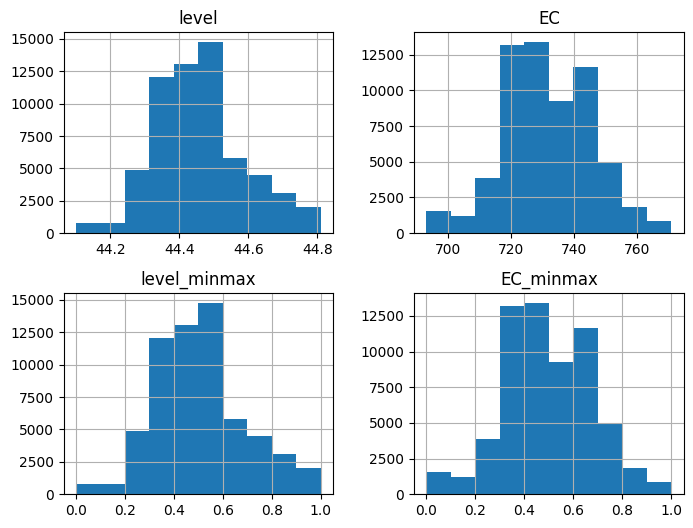

In [36]:
df5.hist(figsize=(8, 6))
plt.show()